## EDA on Olympic Games

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*****************************

In [4]:
athlete_events=pd.read_csv("athlete_events.csv")
noc_regions=pd.read_csv("noc_regions.csv")

In [5]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
# joining dataframes

athlete_df=athlete_events.merge(noc_regions, how='left', on='NOC')
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [8]:
athlete_df.shape

(271116, 17)

In [9]:
athlete_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [11]:
# keeping column names in same pattern

athlete_df.rename(columns= {'region':'Region', 'notes':'Notes'}, inplace=True)
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [12]:
athlete_df.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [13]:
athlete_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [14]:
# printing the columns names containing null values or missing values in the form of list

li=[]
for i in athlete_df.columns:
    if athlete_df[i].isna().any() == True:
        li.append(i)
print("Columns containing null values : ",li)

Columns containing null values :  ['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']


In [15]:
# India details

athlete_df[athlete_df['Team']=='India'].head(3)   # method 1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [16]:
athlete_df.query('Team == "India"').head(3)     # method 2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [17]:
athlete_df.query('Team == "Japan"').head(3) 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN


In [18]:
# top 10 countries with participants from inception

top_countries= athlete_df.Team.value_counts().sort_values(ascending=False).head(10)
top_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

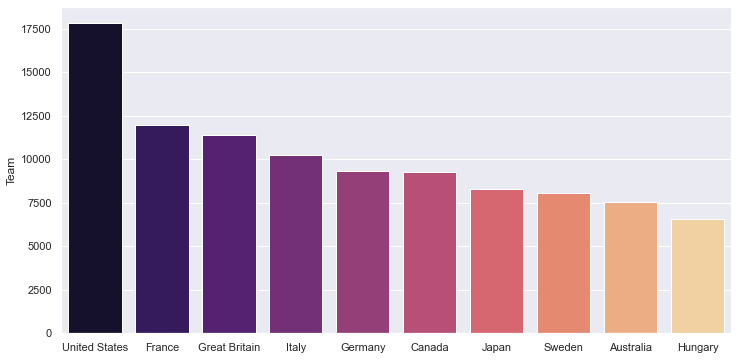

In [60]:
# plot for top 10 countries

sns.set()
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries, palette="magma");
# ax.bar_label(ax.containers[0]) in matplotlib 3.4

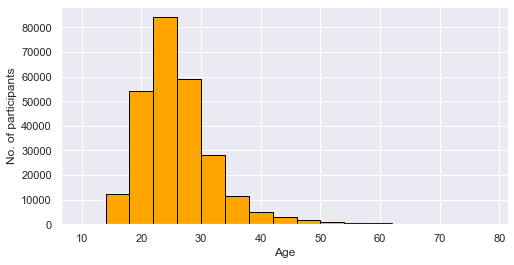

In [22]:
# Age distribution of athletes

plt.figure(figsize=(8,4))
plt.hist(athlete_df['Age'], color='orange', edgecolor='black', bins=np.arange(10,80,4))
plt.xlabel("Age")
plt.ylabel("No. of participants");

In [23]:
# winter and summer olympic sports

winter_sports=athlete_df[athlete_df['Season']=='Winter']['Sport'].unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [24]:
summer_sports=athlete_df[athlete_df['Season']=='Summer']['Sport'].unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [25]:
# male and female participants

gender_count=athlete_df['Sex'].value_counts()
gender_count

M    196594
F     74522
Name: Sex, dtype: int64

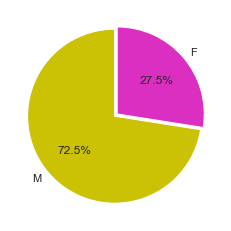

In [59]:
# pie plot for male-female participants


plt.pie(gender_count, labels=gender_count.index, colors=['#ccc205',  '#db2fc1'], autopct='%.1f%%', 
        explode=[0.02]*2, startangle=90)

#for donut
#centre_circle = plt.Circle((0,0),0.60,fc='white')
#fig = plt.gcf()
#fig.gca().add_artist(centre_circle)

plt.show()

In [61]:
# Total medals

athlete_df['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [74]:
# Total number of female athletes in each olympics year wise

female_summer=athlete_df[(athlete_df['Sex']=='F') & (athlete_df['Season']=='Summer')].groupby('Year').count()
female_summer.rename(columns={'Sex':'Female'}, inplace=True)
female_summer[['Female']].head()                                     #method 1

,Female
Year,
1900,33
1904,16
1906,11
1908,47
1912,87


In [76]:
female_winter=athlete_df[(athlete_df['Sex']=='F') & (athlete_df['Season']=='Winter')].groupby('Year').count()
female_winter.rename(columns={'Sex':'Female'}, inplace=True)
female_winter[['Female']].head()

,Female
Year,
1924,17
1928,33
1932,22
1936,81
1948,133


In [90]:
# Using pivot table

gender_wise=athlete_df.pivot_table(index='Year', columns=['Season','Sex'], aggfunc= {'Sex':'count'})
gender_wise.fillna(0, inplace=True)
gender_wise.head(10)                                                  #method 2

Sex                      
Season Summer         Winter       
Sex         F       M      F      M
Year                               
1896      0.0   380.0    0.0    0.0
1900     33.0  1903.0    0.0    0.0
1904     16.0  1285.0    0.0    0.0
1906     11.0  1722.0    0.0    0.0
1908     47.0  3054.0    0.0    0.0
1912     87.0  3953.0    0.0    0.0
1920    134.0  4158.0    0.0    0.0
1924    244.0  4989.0   17.0  443.0
1928    404.0  4588.0   33.0  549.0
1932    347.0  2622.0   22.0  330.0

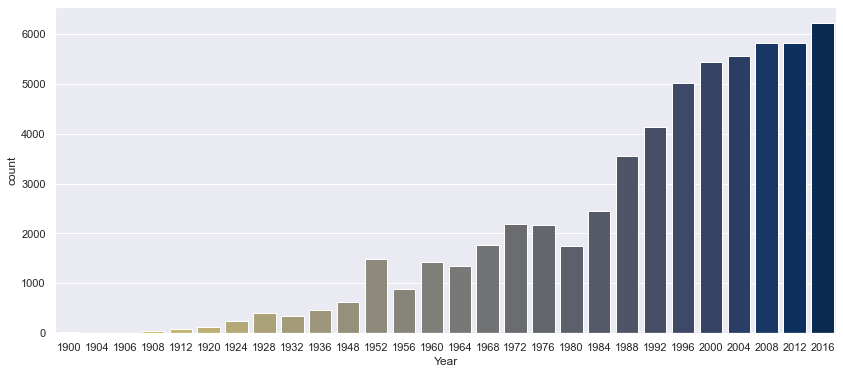

In [95]:
# women participants in summer plot

plt.figure(figsize=(14,6))
womenolympics=athlete_df[(athlete_df['Sex']=='F') & (athlete_df['Season']=='Summer')]
sns.countplot(x='Year', data=womenolympics, palette='cividis_r');

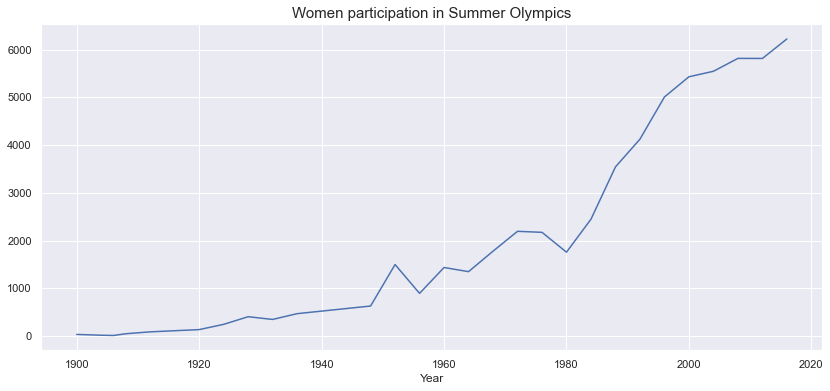

In [107]:
# line graph

plt.figure(figsize=(14,6))
female=womenolympics.groupby('Year')['Sex'].value_counts()
female.loc[:,'F'].plot()
plt.title('Women participation in Summer Olympics', fontsize='15');

In [110]:
# gold medal athlete details

gold_medal=athlete_df[(athlete_df['Medal']=='Gold')]
gold_medal.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN


In [112]:
gold_medal['Age'].isnull().any()

True

In [113]:
# taking only those values that are different from Nan

gold_medal=gold_medal[np.isfinite(gold_medal['Age'])]

False

In [115]:
# gold medal above age 60

gold_medal[gold_medal['Age'] > 60]['Age'].count()

6

In [117]:
# for which sport these 6 gold medal comes

gold_sport=gold_medal[gold_medal['Age'] > 60][['Sport']]
gold_sport

,Sport
104003,Art Competitions
105199,Roque
190952,Archery
226374,Archery
233390,Shooting
261102,Archery


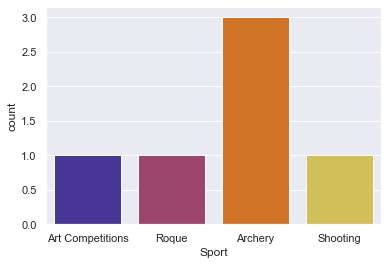

In [120]:
sns.countplot(x=gold_sport['Sport'], palette='CMRmap');

In [138]:
# gold medal from each country

gold_medal[['Region']].value_counts().reset_index(name='Medal').head()

,Region,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


In [147]:
# latest year details in dataset

latest=athlete_df['Year'].max()
print("latest olympic year is ", latest)
print(" ")
# teams with gold medal in latest olympics

team_name=athlete_df[(athlete_df['Year']==latest) & (athlete_df['Medal']=='Gold')]['Team']
team_name.value_counts().head(10)

latest olympic year is  2016
 


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

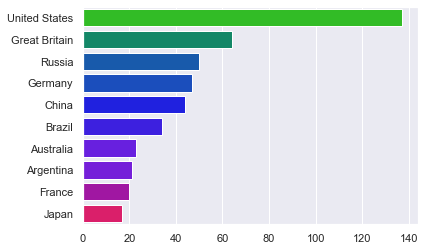

In [151]:
sns.barplot(x=team_name.value_counts().head(10), y=team_name.value_counts().head(10).index, palette='prism_r')
plt.xlabel(None);

In [157]:
# scatterplot with height vs weight of athlete won medals

not_null_medals=athlete_df[(athlete_df['Height'].notnull()) & (athlete_df['Weight'].notnull())
                           & (athlete_df['Medal'].notnull())]
not_null_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN


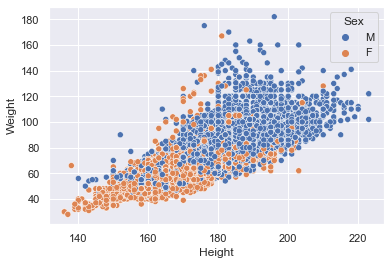

In [159]:
sns.scatterplot(x='Height', y='Weight', hue='Sex', data=not_null_medals);

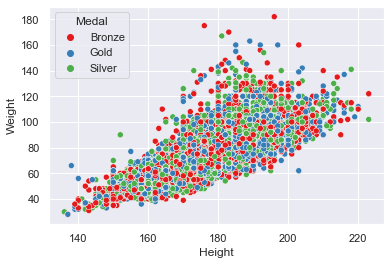

In [168]:
sns.scatterplot(x='Height', y='Weight', hue='Medal', data=not_null_medals, palette='Set1');